# CLASIFICADORES DE MNIST FASHION 

10 Clases de ropa

['Camiseta', 'Pantalon', 'Jersey', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota']

## Clasificadores usados:
- SVM (Scikit-learn)
- Red neuronal multicapa , MLP. (Tensorflow y Scikit-learn)
- OVO (Scikit-learn)

## Accuracys por clasificador 
|    |  SVM  |  MLP (Scikit-learn) | MLP (Tensorflow)  | OVO (SVM)  | 
|--- |---    |---    |---     |---     |
|  Acc (% )  |   89%    |  87%    |  87%    |   | 

  


# Librerias para el correcto funcionamiento del programa.

En caso de no tenerlas instaladas ejecutar siguiente comando:

`pip install -r requirements.txt`


In [ ]:
import os
import sys
import time


import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier

from tensorflow import keras
import tensorflow as tf


### Lectura del dataset "FASHION-MNIST"

Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando que consta de un conjunto de entrenamiento de 60.000 ejemplos y un conjunto de prueba de 10.000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28x28 asociada a una etiqueta de 10 clases. 

- Tamaño de imagen: 28x28
- Numero de imagenes train: 60000
- Numero de imagenes test: 10000
- Numero de clases: 10


In [3]:
test = np.loadtxt("archive/fashion-mnist_test.csv", delimiter=',', skiprows=1)
train = np.loadtxt("archive/fashion-mnist_train.csv",
                   delimiter=',', skiprows=1)

test = test[1:]
train = train[1:]

data = np.vstack((train, test))

X = data[:, 1:]
y = data[:, 0]

X = np.array(X)
y = np.array(y, dtype=np.uint8)


print("Numero ejemplos test: ",len(test))
print("Numero ejemplos train: ",len(train))



Numero ejemplos test:  9999
Numero ejemplos train:  59999


### Ejemplos del dataset:


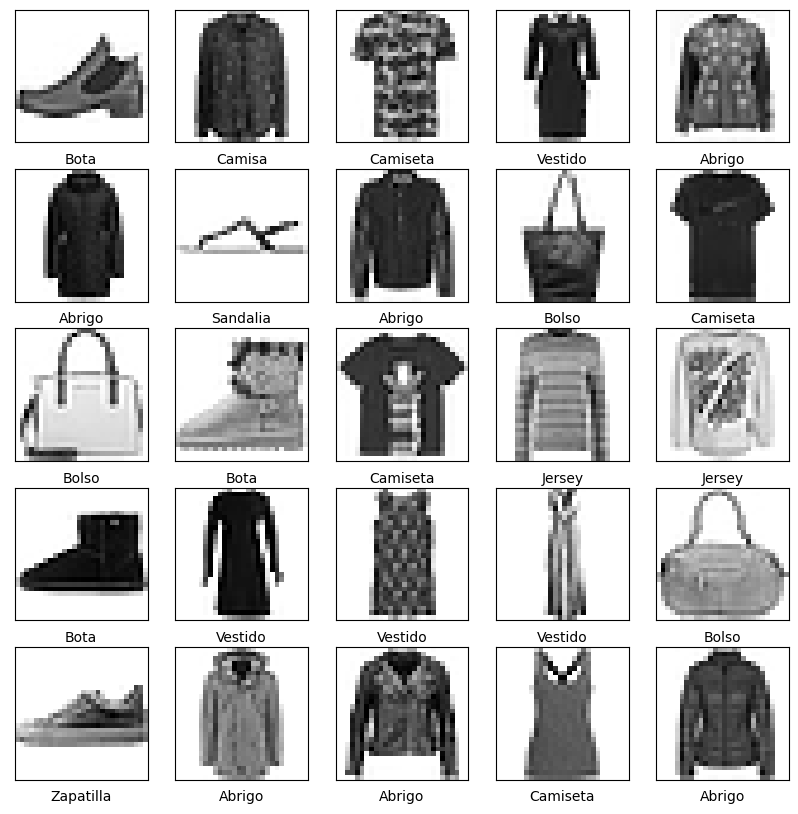

In [4]:
clases = ['Camiseta', 'Pantalon', 'Jersey', 'Vestido', 'Abrigo',
          'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(clases[int(y[i])])
plt.show()


### Uso del ShullfeSplit de Scikit-learn para dividir los datos en un conjunto deseado.




In [5]:
rs = ShuffleSplit(n_splits=10, test_size=.20, random_state=0)
for train_index, test_index in rs.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]


print("SHAPE Xtrain", X_train.shape)
print("SHAPE y_train", y_train.shape)
print("SHAPE X_test", X_test.shape)
print("SHAPE y_test", y_test.shape)


SHAPE Xtrain (55998, 784)
SHAPE y_train (55998,)
SHAPE X_test (14000, 784)
SHAPE y_test (14000,)


## CLSIFICADOR 1: SVM (Scikit-learn)

In [7]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy SVM : "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

## CLASIFICADOR 2: MLP (Scikit-learn)

In [ ]:
hidden_sizes = range(1, 70, 10)
accuracies = np.zeros(len(hidden_sizes))

for s, size in enumerate(hidden_sizes):
    # Crea el clasificador con size neuronas en la capa oculta.
    # Después entrénalo, y obten la precisión en los datos de entrenamiento.
    # Guarda la precisión final en una variable accTrain.
    clasificador = MLPClassifier(hidden_layer_sizes=(
        size, 20, 10), solver='adam', max_iter=2000, alpha=0.01)

    clasificador.fit(X_train, y_train.ravel())

    y_pred = clasificador.predict(X_test)

    accTrain = accuracy_score(y_pred, y_test)

    accuracies[s] = accTrain

print('Max accuracy con:', hidden_sizes[np.argmax(accuracies)])
print(max(accuracies))
# Muestra en una gráfica como ha cambiado el error conforme aumentábamos hidden_sizes
plt.plot(hidden_sizes, accuracies)
plt.xlabel('hidden_sizes')
plt.ylabel('Accuracy')


### CON EL TAMAÑO OPTIMO DE CAPAS

In [ ]:
clasificador = MLPClassifier(hidden_layer_sizes=(
    65, 20, 15, 10), solver='adam', max_iter=3000, alpha=0.001)

clasificador.fit(X_train, y_train.ravel())

y_pred = clasificador.predict(X_test)

print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))


## CLASIFICADOR 3: MLP (Tensorflow)

Hemos usado Tensorflow ya que es mucho mas rapido (al usar gpu)  y mas facil de implementar.

Se leen los datos  con una utilidad de keras, ya que el dataset ya viene incluido con la libreria.

In [ ]:
from tensorflow import keras
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

Se convierten los datos a un rango [0,1] y las clases a numeros entre [0,9] 

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


Se crea la red neuronal con sus respectivas capas y funciones de activación

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, batch_size=2000, epochs=10,shuffle = 1,validation_split = 0.2, validation_data=(x_test, y_test))

In [ ]:
results = model.evaluate(x_test,  y_test, verbose=0)
print('test loss, test acc:', results)
